In [11]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [24]:
dataset_path = "/content/drive/MyDrive/Akhund-and-Human"

image_data_generator = ImageDataGenerator(rescale=1./255,
                                          validation_split=0.1,
                                          brightness_range=(0.8, 1.2),
                                          horizontal_flip=True
)

dataset_train = image_data_generator.flow_from_directory(dataset_path,
                                                          target_size=(224, 224),
                                                          batch_size=32,
                                                          subset="training",
                                                          shuffle=True
)


daatset_validation = image_data_generator.flow_from_directory(dataset_path,
                                                          target_size=(224, 224),
                                                          batch_size=32,
                                                          subset="validation",
                                                          shuffle=False
)


Found 421 images belonging to 2 classes.
Found 45 images belonging to 2 classes.


In [25]:
dataset_train.class_indices

{'Akhund': 0, 'Human': 1}

In [26]:
base_model = tf.keras.applications.MobileNetV2(input_shape=(224, 224, 3),
                                                include_top=False,
                                                weights='imagenet',
                                                )

In [27]:
for layer in base_model.layers[:-4]:
    layer.trainable = False

In [28]:
model = tf.keras.models.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.7),
    tf.keras.layers.Dense(2, activation='softmax')
])

model.compile(optimizer="rmsprop",loss="categorical_crossentropy",metrics=["accuracy"])

In [29]:
history = model.fit(dataset_train,
                    epochs=10,
                    validation_data=daatset_validation,
                    )

Epoch 1/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 21s 921ms/step - accuracy: 0.7374 - loss: 0.8902 - val_accuracy: 0.7333 - val_loss: 1.5492
Epoch 2/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 5s 382ms/step - accuracy: 0.9405 - loss: 0.1524 - val_accuracy: 0.8222 - val_loss: 1.2982
Epoch 3/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 5s 329ms/step - accuracy: 0.9611 - loss: 0.0864 - val_accuracy: 0.7556 - val_loss: 1.9449
Epoch 4/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 5s 357ms/step - accuracy: 0.9779 - loss: 0.0532 - val_accuracy: 0.7556 - val_loss: 2.1546
Epoch 5/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 5s 393ms/step - accuracy: 0.9727 - loss: 0.0692 - val_accuracy: 0.8222 - val_loss: 1.3737
Epoch 6/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 5s 337ms/step - accuracy: 0.9645 - loss: 0.1072 - val_accuracy: 0.8667 - val_loss: 1.6830
Epoch 7/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 5s 387ms/step - accuracy: 0.9643 - loss: 0.0879 - val_accuracy: 0.8222 - val_loss: 2.3713
Epoch 8/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 5s 317ms/step - accuracy: 0.9938 - loss: 0.0119 - val_accuracy: 0

In [30]:
model.save("my_model.h5")

In [34]:
y_pred = model.predict(daatset_validation)
y_pred = np.argmax(y_pred, axis=1)

y_true = daatset_validation.classes

cm = confusion_matrix(y_true, y_pred)
cm

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


array([[24,  0],
       [ 7, 14]])

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


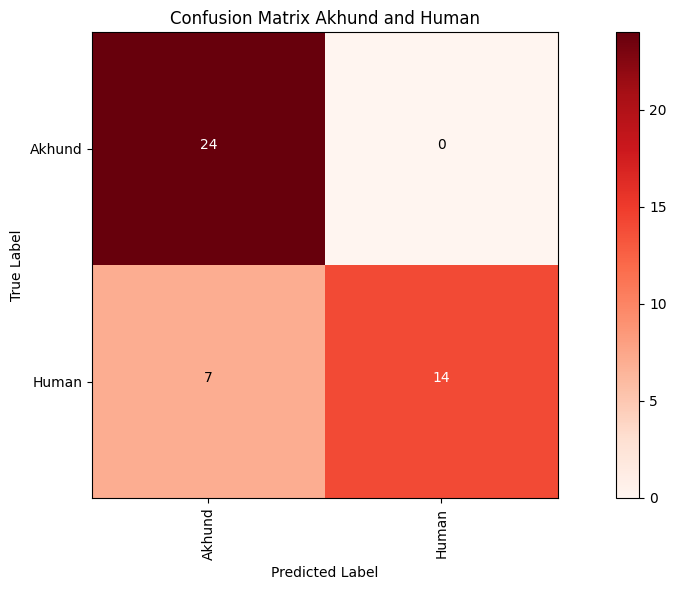

In [44]:
y_pred = model.predict(daatset_validation)
y_pred_classes = np.argmax(y_pred, axis=1)

y_true = daatset_validation.classes

cm = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(12,6))
plt.imshow(cm, interpolation='nearest', cmap='Reds')
plt.title('Confusion Matrix Akhund and Human')
plt.colorbar()

thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(np.arange(len(daatset_validation.class_indices)), list(daatset_validation.class_indices.keys()), rotation=90)
plt.yticks(np.arange(len(daatset_validation.class_indices)), list(daatset_validation.class_indices.keys()))
plt.tight_layout()
plt.show()